In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from astropy import constants as cn
from astropy import units as u

In [447]:
X=0.63
Y=0.35
Z=0.02
mu=(2.0*X + 0.75*Y + 0.5*Z)**(-1)
mh=(cn.m_p).value
sigma=(cn.sigma_sb).value
c=(cn.c).value
R=(cn.R).value
G=(cn.G).value
R_sun=(cn.R_sun).value
M_sun=(cn.M_sun).value
L_sun=(cn.L_sun).value
kB=(cn.k_B).value

In [464]:
def rho(y, r):
    Mr, P, Lr, T = y
    rho0=(P-((4.0*(sigma)*np.power(T,4.0))/(3.0*(c))))*(mu*mh/kB*T)
    return rho0

def eps(y,r):
    Mr, P, Lr, T = y
    eopp = 1.08*(10**-12)
    eocno = 8.24*(10**-31)
    rho0 = rho(y, r)
    X_H = 0.64
    X_CNO = 0.015
    epp = eopp*rho0*(X_H**2.0)*((T/(10**6))**4.0)
    ecno = eocno*rho0*X_H*X_CNO*((T/(10**6))**19.9)
    eps0 = epp+ecno
    return eps0

def K(y,r):
    Mr, P, Lr, T =y
    rho0 = rho(y,r)
    gbf=1.0
    gff=1.9
    t=10.0
    kbf=(4.3e21)*gbf*Z*(1.0+X)*rho0*np.power(T,-3.5)/t 
    kff=(3.7e18)*gff*(1.0-Z)*(1.0+X)*rho0*np.power(T,-3.5)
    ke=0.02*(1.0+X)
    K0=((kbf+kff+ke)/3.0) 
    return K0

def dMdr(y,r):
    Mr, P, Lr, T = y
    rho0 = rho(y,r)
    dmdr0=4.0*np.pi*np.power(r,2)*rho0
    return dmdr0

def dPdr(y,r):
    Mr, P, Lr, T = y
    rho0 = rho(y,r)
    dpdr0=-G*Mr*rho0*np.power(r,-2.0)
    return dpdr0

def dLdr(y,r):
    Mr, P, Lr, T = y
    rho0 = rho(y,r)
    eps0 = eps(y,r)
    dldr0=eps0*rho0*4.0*np.pi*np.power(r,2.0)
    return dldr0

def dTdr(y,r):
    Mr, P, Lr, T = y
    rho0 = rho(y,r)
    K0 = K(y,r)
    dtdr0=(((-3.0)/(16.0*(sigma)))*((K0*rho0)/np.power(T,3.0))*((Lr)/(4.0*np.pi*np.power(r,2.0))))
    return dtdr0

def f(y,r):
    Mr, P, Lr, T = y
    equations = [dMdr(y,r), dPdr(y,r), dLdr(y,r), dTdr(y,r)]
    return equations

In [482]:
#initial values
Mr0=0.0
P0=2.3e16
Lr0=0.0
T0=15.7e6

#initial conditions
y0 = [Mr0, P0, Lr0, T0]

#radius array
r=np.linspace(0.1, R_sun, 10000)

#ODE solver
psoln = odeint(f, y0, r)


Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


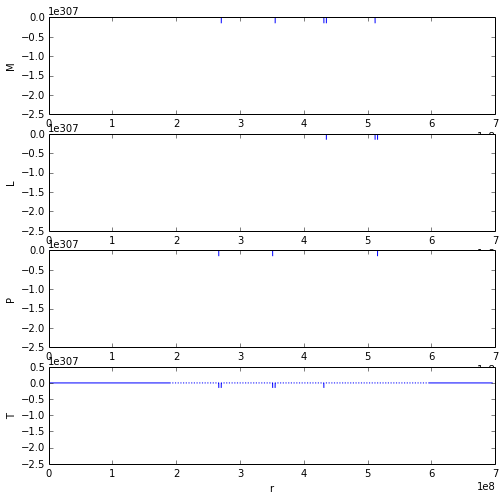

In [483]:

#plot results
fig = plt.figure(1, figsize=(8,8))

#plot M as a function of r
ax = fig.add_subplot(411)
ax.plot(r, psoln[:,0])
ax.set_xlabel('r')
ax.set_ylabel('M')

#plot L as a function of r
ax = fig.add_subplot(412)
ax.plot(r, psoln[:,1])
ax.set_xlabel('r')
ax.set_ylabel('L')

#plot P as a function of r
ax = fig.add_subplot(413)
ax.plot(r, psoln[:,2])
ax.set_xlabel('r')
ax.set_ylabel('P')

#plot T as a function of r
ax = fig.add_subplot(414)
ax.plot(r, psoln[:,3])
ax.set_xlabel('r')
ax.set_ylabel('T')

plt.show()
